In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
import random
import numpy as np
import math
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from scipy.spatial import distance
Iris = sns.load_dataset("iris")

In [2]:
class GaussianNaiveBayes:
  def __init__(self , features , targets):
    self.features = features
    self.targets = targets
    self.gaussians = [ [ 0 for i in range(targets.shape[1]) ] for j in range(features.shape[1]) ]
    

  def fitModel(self):
    for i in range(len(self.gaussians)):
      for j in range(len(self.gaussians[0])):
        featureTarget = np.hstack((self.features[:,i].reshape(-1,1) , self.targets[:,j].reshape(-1,1)))
        self.gaussians[i][j] = gaussian(featureTarget[featureTarget[:,1]==1,:])


  def predict(self , Qdata):
    likelihood = np.zeros(self.targets.shape[1])
    for i in range(likelihood.shape[0]):
      likelihood[i] = np.log(np.count_nonzero(self.targets[:,i] == 1) / self.targets.shape[0])
      for j in range(self.features.shape[1]):
        likelihood[i] += np.log(self.gaussians[j][i].computeGaussianFunc(Qdata[j]))

    return np.argmax(likelihood) , likelihood

       


class gaussian():
  def __init__(self , featureTarget):
    self.mean = np.mean(featureTarget, axis=0)[0]
    self.std =  np.std(featureTarget, axis=0)[0]

  def computeGaussianFunc(self , x):
    return (math.exp((((x - self.mean)/self.std)**2)/(-2))) / (self.std * math.sqrt(2 * math.pi)) 

In [3]:
iris = datasets.load_iris()
features = iris.data  
target = iris.target
target1 = pd.get_dummies(iris.target).to_numpy()
dataset = np.hstack(( features,target1 ,target.reshape(-1,1)))
dataset.shape
#---------------shuffle---------------------
from sklearn.utils import shuffle
dataset=shuffle(dataset)
dataset.shape

#-------------test & train ---------------
train=dataset[0:120,:]    
test=dataset[120:,:]  
test.shape                #(30, 7)
train.shape              # (120, 7)

(120, 8)

In [4]:
A = GaussianNaiveBayes(train[:,0:4],train[:,4:7])
A.fitModel()

96.66666666666667 %  




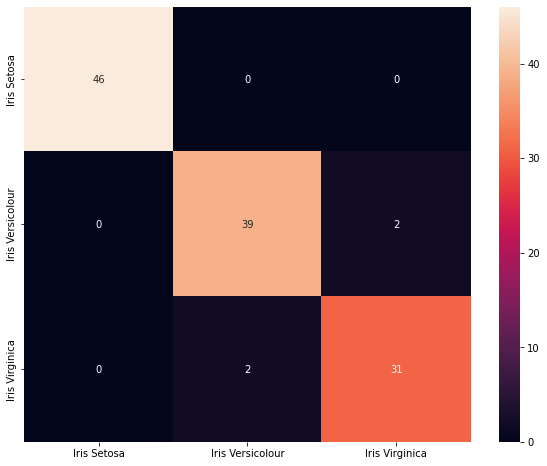

In [5]:
#--------acc on train data -------------------------
y_pred=[]
for i in range(train.shape[0]):
  y_pred.append(A.predict(train[i,0:4])[0])


from sklearn.metrics import confusion_matrix
y_true = train[:,7].T
cm = confusion_matrix(y_true, y_pred)


df_cm = pd.DataFrame(cm,['Iris Setosa','Iris Versicolour','Iris Virginica'],['Iris Setosa','Iris Versicolour','Iris Virginica'])
plt.figure(figsize = (10,8))
sns.heatmap(df_cm, annot=True)


true = np.diag(cm)
accuricy = np.sum(true)/np.sum(cm)
print(str(accuricy * 100)+' % ' , '\n\n')

90.0 %  




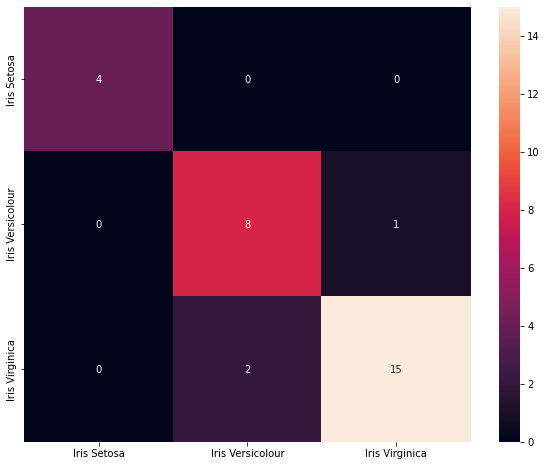

In [6]:
#----------------test data------------------
y_pred=[]
for i in range(test.shape[0]):
  y_pred.append(A.predict(test[i,0:4])[0])


from sklearn.metrics import confusion_matrix
y_true = test[:,7].T
cm = confusion_matrix(y_true, y_pred)


df_cm = pd.DataFrame(cm,['Iris Setosa','Iris Versicolour','Iris Virginica'],['Iris Setosa','Iris Versicolour','Iris Virginica'])
plt.figure(figsize = (10,8))
sns.heatmap(df_cm, annot=True)

true = np.diag(cm)
accuricy = np.sum(true)/np.sum(cm)
print(str(accuricy * 100)+' % ' , '\n\n')